In [119]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df= pd.read_csv("Rapido.csv")
df.dropna(how="all", inplace=True)

In [4]:
df.head()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
0,ID001,CUST_001,1.546710e+12,17.442705,78.387878,17.457829,78.399056,2.806,12.609667,37.0
1,ID002,CUST_002,1.546710e+12,17.490189,78.415512,17.450548,78.367294,11.991,24.075200,119.0
2,ID003,CUST_003,1.546710e+12,17.370108,78.515045,17.377041,78.517921,1.322,8.708300,27.0
3,ID004,CUST_004,1.546710e+12,17.439314,78.443001,17.397131,78.516586,11.822,24.037550,121.0
4,ID005,CUST_005,1.546710e+12,17.432325,78.381966,17.401625,78.400032,6.978,16.120867,58.0


In [5]:
df.tail()

,trip_id,customer_id,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
44582,ID44583,CUST_19137,1.546530e+12,17.443661,78.391968,17.451042,78.371658,5.665,12.573883,55.0
44583,ID44584,CUST_19138,1.546530e+12,17.439289,78.396118,17.449976,78.389160,9.292,17.937717,76.0
44584,ID44585,CUST_5061,1.546530e+12,17.363689,78.535194,17.374418,78.529823,5.485,17.403850,55.0
44585,ID44586,CUST_19139,1.546530e+12,17.401539,78.570076,17.416904,78.591362,2.326,14.236767,35.0
44586,ID44587,CUST_15562,1.546530e+12,17.385243,78.479896,17.394102,78.499550,3.204,7.085400,37.0


In [6]:

import datetime



x = df.iloc[5,3]

date = datetime.datetime.fromtimestamp(x / 1e3)

print(date.strftime('%Y-%m-%d %H:%M:%S'))

1970-01-01 05:30:00


In [7]:
x

17.4106674

In [8]:
dates = []
for i in df.timestamp:
    date = datetime.datetime.fromtimestamp(i / 1e3)
    dates.append(date)


In [9]:
df.isnull().sum()

trip_id            0
customer_id        0
timestamp          0
pick_lat           0
pick_lng           0
drop_lat           0
drop_lng           0
travel_distance    0
travel_time        0
trip_fare          0
dtype: int64

In [10]:
df.describe()

,timestamp,pick_lat,pick_lng,drop_lat,drop_lng,travel_distance,travel_time,trip_fare
count,4.458700e+04,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000,44587.000000
mean,1.546632e+12,17.427919,78.435542,17.427891,78.434897,5.094359,15.819835,53.872833
std,1.519034e+08,0.030049,0.053333,0.037722,0.054965,3.365008,23.462865,33.430462
min,1.546370e+12,17.330339,78.308258,12.921696,77.548103,-1.000000,0.022750,20.000000
25%,1.546500e+12,17.405327,78.386562,17.405660,78.385010,2.744500,8.428525,36.000000
50%,1.546610e+12,17.432136,78.438866,17.431213,78.438164,4.299000,13.126250,46.000000
75%,1.546770e+12,17.446777,78.480839,17.446907,78.480255,6.679500,20.111167,60.000000
max,1.546890e+12,17.529791,78.600647,17.736155,78.634804,52.801000,4134.388700,1670.000000


In [11]:
from geopy.distance import great_circle

In [12]:
Pick_up=(17.442705,78.387878)
Drop= (17.457829,78.399056)


In [13]:
print(great_circle(Pick_up,Drop).km)

2.0577007701190553


In [14]:
df.columns

Index(['trip_id', 'customer_id', 'timestamp', 'pick_lat', 'pick_lng',
       'drop_lat', 'drop_lng', 'travel_distance', 'travel_time', 'trip_fare'],
      dtype='object')

In [15]:
df[['trip_id','customer_id','timestamp','travel_distance','travel_time','trip_fare']].describe()

,timestamp,travel_distance,travel_time,trip_fare
count,4.458700e+04,44587.000000,44587.000000,44587.000000
mean,1.546632e+12,5.094359,15.819835,53.872833
std,1.519034e+08,3.365008,23.462865,33.430462
min,1.546370e+12,-1.000000,0.022750,20.000000
25%,1.546500e+12,2.744500,8.428525,36.000000
50%,1.546610e+12,4.299000,13.126250,46.000000
75%,1.546770e+12,6.679500,20.111167,60.000000
max,1.546890e+12,52.801000,4134.388700,1670.000000


In [16]:
df['trip_fare'].mean()

53.8728328885101

In [17]:
df.groupby(['travel_distance','travel_time'])['trip_fare'].mean()

travel_distance  travel_time
-1.000           11.014850      959.0
                 11.838667      959.0
                 19.247367      959.0
 0.000           0.043200        20.0
                 0.044667        20.0
                 0.047017        20.0
                 0.048400        20.0
                 0.048483        20.0
                 0.049283        20.0
                 0.049400        20.0
                 0.049550        20.0
                 0.049850        20.0
                 0.050017        20.0
                 0.050350        20.0
                 0.050750        20.0
                 0.050933        20.0
                 0.050950        20.0
                 0.050967        20.0
                 0.051667        20.0
                 0.051700        20.0
                 0.052050        20.0
                 0.052167        20.0
                 0.052183        20.0
                 0.052633        20.0
                 0.053167        20.0
                 0.05

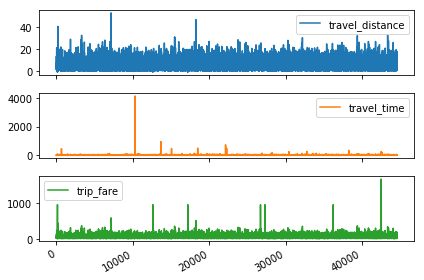

In [18]:
df.loc[:,'travel_distance':'trip_fare'].plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

In [19]:
from datetime import date

In [20]:
filter_df = df.customer_id.value_counts() >=2

filter_df.head()

CUST_279     True
CUST_4119    True
CUST_3100    True
CUST_1237    True
CUST_232     True
Name: customer_id, dtype: bool

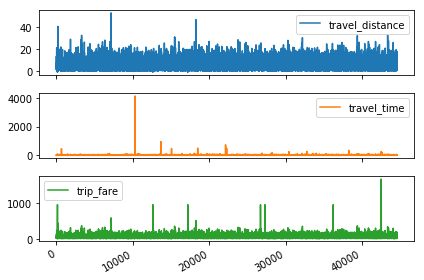

In [21]:
df.loc[:,'travel_distance':'trip_fare'].plot(subplots=True)
plt.xlabel("")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'trip_fare')

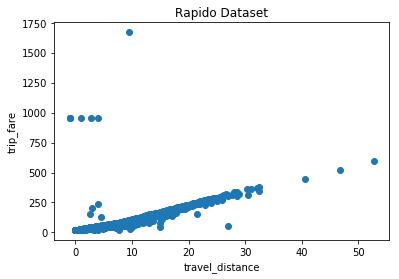

In [22]:
fig, ax = plt.subplots()
ax.scatter(df['travel_distance'], df['trip_fare'])
ax.set_title('Rapido Dataset')
ax.set_xlabel('travel_distance')
ax.set_ylabel('trip_fare')

Text(0, 0.5, 'travel_distance')

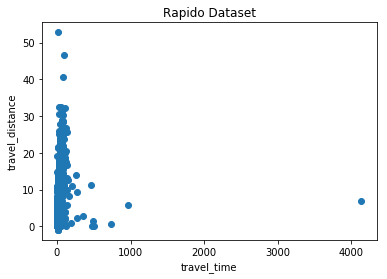

In [23]:
fig, ax = plt.subplots()
ax.scatter(df['travel_time'], df['travel_distance'])
ax.set_title('Rapido Dataset')
ax.set_xlabel('travel_time')
ax.set_ylabel('travel_distance')

Text(0, 0.5, 'trip_fare')

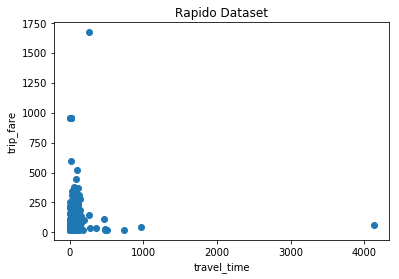

In [24]:
fig, ax = plt.subplots()
ax.scatter(df['travel_time'], df['trip_fare'])
ax.set_title('Rapido Dataset')
ax.set_xlabel('travel_time')
ax.set_ylabel('trip_fare')

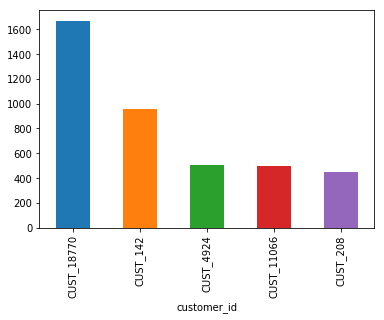

In [25]:
df.groupby("customer_id").trip_fare.mean().sort_values(ascending=False)[:5].plot.bar()

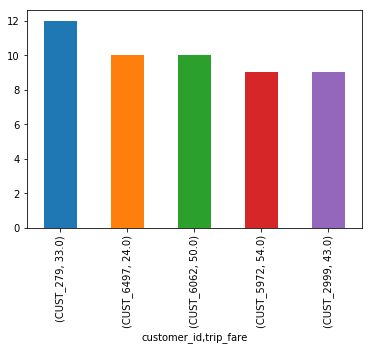

In [26]:
df.groupby("customer_id").trip_fare.value_counts().sort_values(ascending=False)[:5].plot.bar()

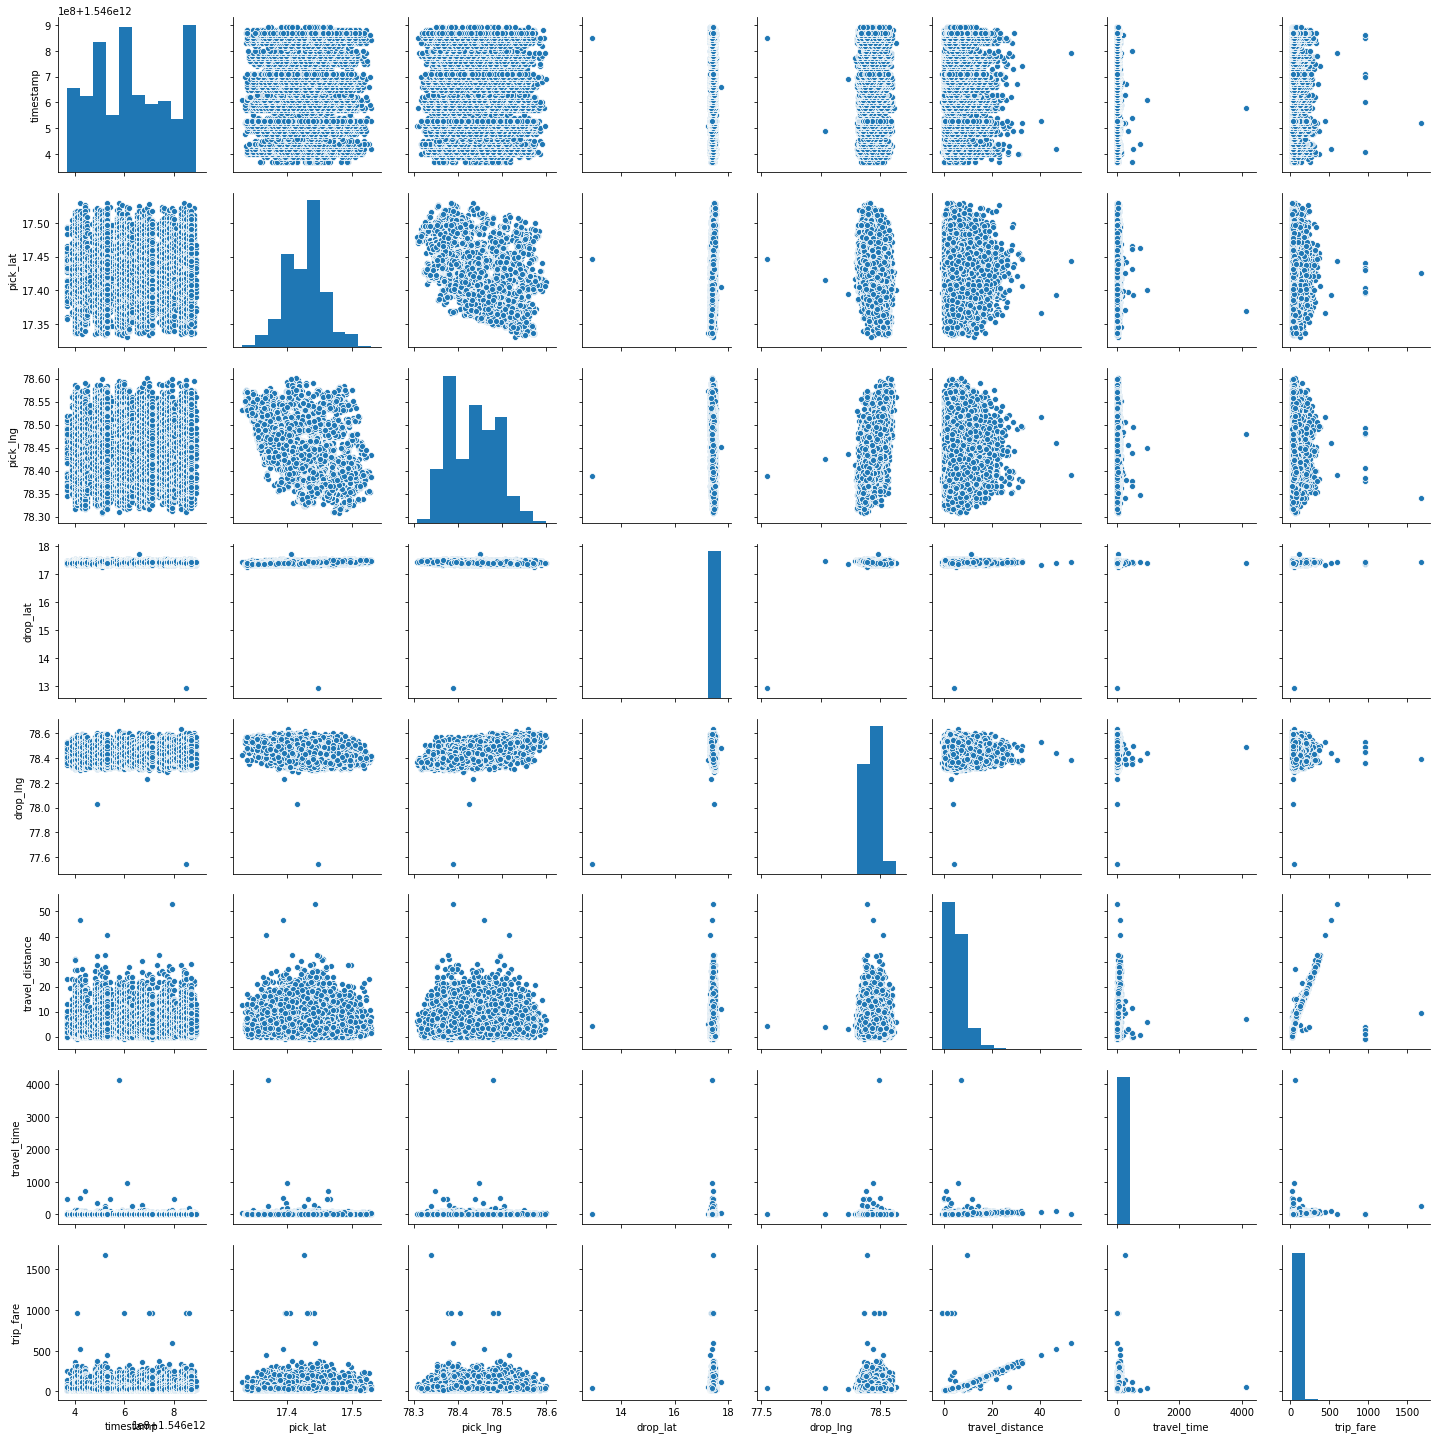

In [27]:
sns.pairplot(df)

In [28]:
filter_df = df.customer_id.value_counts() >=2

filter_df.head()

CUST_279     True
CUST_4119    True
CUST_3100    True
CUST_1237    True
CUST_232     True
Name: customer_id, dtype: bool

In [29]:
df['trip_id'].value_counts()>=2

ID35750    False
ID15346    False
ID9301     False
ID22069    False
ID4714     False
ID15360    False
ID42646    False
ID15064    False
ID31602    False
ID42085    False
ID13192    False
ID21970    False
ID44231    False
ID2761     False
ID31847    False
ID6464     False
ID40977    False
ID25809    False
ID23447    False
ID15980    False
ID9461     False
ID26924    False
ID24770    False
ID2273     False
ID24577    False
ID15602    False
ID17988    False
ID8817     False
ID38450    False
ID26993    False
           ...  
ID29990    False
ID2627     False
ID32205    False
ID560      False
ID27827    False
ID18108    False
ID31127    False
ID4301     False
ID25695    False
ID37773    False
ID3208     False
ID19264    False
ID7792     False
ID17929    False
ID39167    False
ID15770    False
ID4424     False
ID14490    False
ID26941    False
ID38473    False
ID6947     False
ID28564    False
ID37731    False
ID42288    False
ID20016    False
ID14761    False
ID19516    False
ID37732    Fal

In [39]:
import pandas
x=df[['travel_distance','travel_time']]
y=df['trip_fare']

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

from sklearn.linear_model import LinearRegression
regr= LinearRegression()
regr.fit(xtrain,ytrain)

import math
from sklearn.metrics import r2_score
#diff between predicted and actual
pridiction = regr.predict(xtrain)
diff=ytrain - pridiction
#cal the rmse
rmse=(diff.sum()**2)/(len(df))
print("The RMSE value is            :" ,math.sqrt(rmse))
k=math.sqrt(rmse)
w=ytrain.mean()
coeff=k/w
print("The rcoeff is                :", coeff)
r2score=r2_score(ytrain,pridiction)
print("The R-Sqr of the regssion is :",r2score)

(31210, 2)
(31210,)
(13377, 2)
(13377,)
The RMSE value is            : 1.302392626281759e-12
The rcoeff is                : 2.4183053204127772e-14
The R-Sqr of the regssion is : 0.835605193974067


In [40]:
predicttrip_fare=regr.predict([[3.5,15]])
print(predicttrip_fare)



[39.80368681]


In [31]:
trip =df.groupby('customer_id')['trip_id'].size()

In [32]:
trip

customer_id
CUST_001      8
CUST_002      1
CUST_003      6
CUST_004     15
CUST_005      2
CUST_006     11
CUST_007      1
CUST_008      2
CUST_009      1
CUST_010      1
CUST_011      1
CUST_012      3
CUST_013      3
CUST_014      5
CUST_015      1
CUST_016      3
CUST_017      2
CUST_018      1
CUST_019      2
CUST_020      2
CUST_021      1
CUST_022      6
CUST_023      5
CUST_024      1
CUST_025      6
CUST_026     11
CUST_027     13
CUST_028      5
CUST_029     10
CUST_030      4
             ..
CUST_9972     9
CUST_9973     4
CUST_9974     3
CUST_9975     1
CUST_9976     2
CUST_9977     2
CUST_9978     1
CUST_9979     6
CUST_998      1
CUST_9980     3
CUST_9981     1
CUST_9982     1
CUST_9983     1
CUST_9984     1
CUST_9985     1
CUST_9986     3
CUST_9987     1
CUST_9988     2
CUST_9989     2
CUST_999      9
CUST_9990     1
CUST_9991     1
CUST_9992     4
CUST_9993     4
CUST_9994     6
CUST_9995     1
CUST_9996     1
CUST_9997     3
CUST_9998     3
CUST_9999     1
Name: trip_i

In [153]:
temp = []
for i in trip.iteritems():
    if i[1] >= 2:
        temp.append(i)
print(temp)

[('CUST_001', 8), ('CUST_003', 6), ('CUST_004', 15), ('CUST_005', 2), ('CUST_006', 11), ('CUST_008', 2), ('CUST_012', 3), ('CUST_013', 3), ('CUST_014', 5), ('CUST_016', 3), ('CUST_017', 2), ('CUST_019', 2), ('CUST_020', 2), ('CUST_022', 6), ('CUST_023', 5), ('CUST_025', 6), ('CUST_026', 11), ('CUST_027', 13), ('CUST_028', 5), ('CUST_029', 10), ('CUST_030', 4), ('CUST_031', 8), ('CUST_032', 7), ('CUST_034', 5), ('CUST_035', 11), ('CUST_037', 4), ('CUST_038', 4), ('CUST_040', 4), ('CUST_041', 4), ('CUST_042', 4), ('CUST_044', 2), ('CUST_045', 8), ('CUST_048', 3), ('CUST_049', 2), ('CUST_051', 4), ('CUST_052', 10), ('CUST_053', 3), ('CUST_054', 6), ('CUST_055', 2), ('CUST_056', 13), ('CUST_057', 10), ('CUST_058', 10), ('CUST_060', 5), ('CUST_061', 2), ('CUST_062', 6), ('CUST_063', 10), ('CUST_064', 6), ('CUST_065', 2), ('CUST_066', 8), ('CUST_067', 5), ('CUST_068', 3), ('CUST_070', 6), ('CUST_073', 2), ('CUST_074', 2), ('CUST_076', 9), ('CUST_077', 11), ('CUST_078', 3), ('CUST_079', 7), (

In [161]:
average_duration = {} 
for i in temp:
    t1 = df[df['customer_id'] == i[0]]['timestamp']
    indTime = []
    for j in t1.iteritems():
        new_time = datetime.datetime.fromtimestamp(j[1] / 1e3)
        indTime.append(new_time)
    average_duration[i[0]] = (indTime[0] + (indTime[1] - indTime[0]) / 2)
    
print("Customer ID", "Average Duration[in datetime]")
for (key, value) in average_duration.items():
    print(key, "-", value)

Customer ID Average Duration[in datetime]
CUST_001 - 2019-01-06 21:23:20
CUST_003 - 2019-01-06 22:46:40
CUST_004 - 2019-01-04 11:03:20
CUST_005 - 2019-01-06 06:06:40
CUST_006 - 2019-01-06 21:23:20
CUST_008 - 2019-01-05 21:46:40
CUST_012 - 2019-01-05 09:16:40
CUST_013 - 2019-01-05 10:40:00
CUST_014 - 2019-01-06 06:06:40
CUST_016 - 2019-01-06 10:16:40
CUST_017 - 2019-01-05 17:36:40
CUST_019 - 2019-01-05 23:10:00
CUST_020 - 2019-01-05 21:46:40
CUST_022 - 2019-01-06 22:46:40
CUST_023 - 2019-01-07 00:10:00
CUST_025 - 2019-01-06 00:33:20
CUST_026 - 2019-01-06 22:46:40
CUST_027 - 2019-01-06 22:46:40
CUST_028 - 2019-01-04 22:10:00
CUST_029 - 2019-01-04 23:33:20
CUST_030 - 2019-01-06 00:33:20
CUST_031 - 2019-01-04 23:33:20
CUST_032 - 2019-01-04 22:10:00
CUST_034 - 2019-01-06 22:46:40
CUST_035 - 2019-01-04 22:10:00
CUST_037 - 2019-01-05 23:10:00
CUST_038 - 2019-01-06 07:30:00
CUST_040 - 2019-01-04 23:33:20
CUST_041 - 2019-01-04 23:33:20
CUST_042 - 2019-01-04 23:33:20
CUST_044 - 2019-01-06 22:46:

CUST_10877 - 2019-01-02 13:13:20
CUST_1088 - 2019-01-02 11:50:00
CUST_10880 - 2019-01-02 13:13:20
CUST_10881 - 2019-01-02 16:00:00
CUST_10882 - 2019-01-02 14:36:40
CUST_10884 - 2019-01-02 13:13:20
CUST_10887 - 2019-01-05 00:56:40
CUST_10890 - 2019-01-02 13:13:20
CUST_10892 - 2019-01-03 17:00:00
CUST_10893 - 2019-01-02 14:36:40
CUST_10895 - 2019-01-02 14:36:40
CUST_10898 - 2019-01-02 13:13:20
CUST_10899 - 2019-01-03 01:43:20
CUST_109 - 2019-01-06 22:46:40
CUST_10902 - 2019-01-03 17:00:00
CUST_10903 - 2019-01-02 13:13:20
CUST_10905 - 2019-01-03 01:43:20
CUST_10908 - 2019-01-04 22:10:00
CUST_10909 - 2019-01-03 03:06:40
CUST_1091 - 2019-01-03 10:03:20
CUST_10910 - 2019-01-04 23:33:20
CUST_10914 - 2019-01-02 13:13:20
CUST_10918 - 2019-01-02 14:36:40
CUST_1092 - 2019-01-02 21:33:20
CUST_10927 - 2019-01-02 16:00:00
CUST_1093 - 2019-01-04 22:10:00
CUST_1094 - 2019-01-05 03:43:20
CUST_10941 - 2019-01-02 14:36:40
CUST_10945 - 2019-01-03 03:06:40
CUST_10953 - 2019-01-02 13:13:20
CUST_10955 - 2019

CUST_11946 - 2019-01-05 02:20:00
CUST_11949 - 2019-01-04 05:30:00
CUST_1195 - 2019-01-06 03:20:00
CUST_11950 - 2019-01-02 17:23:20
CUST_11951 - 2019-01-05 00:56:40
CUST_11952 - 2019-01-03 00:20:00
CUST_11956 - 2019-01-05 05:06:40
CUST_11958 - 2019-01-05 06:30:00
CUST_11961 - 2019-01-04 04:06:40
CUST_11963 - 2019-01-03 01:43:20
CUST_11965 - 2019-01-04 02:43:20
CUST_11969 - 2019-01-04 04:06:40
CUST_1197 - 2019-01-07 08:30:00
CUST_11970 - 2019-01-04 05:30:00
CUST_11971 - 2019-01-02 18:46:40
CUST_11972 - 2019-01-05 02:20:00
CUST_11973 - 2019-01-02 18:46:40
CUST_11975 - 2019-01-04 06:53:20
CUST_11976 - 2019-01-02 18:46:40
CUST_11979 - 2019-01-04 06:53:20
CUST_1198 - 2019-01-06 08:53:20
CUST_11981 - 2019-01-03 05:53:20
CUST_11982 - 2019-01-03 05:53:20
CUST_11988 - 2019-01-02 18:46:40
CUST_11989 - 2019-01-05 00:56:40
CUST_1199 - 2019-01-07 04:20:00
CUST_11990 - 2019-01-04 04:06:40
CUST_11995 - 2019-01-02 18:46:40
CUST_11996 - 2019-01-02 18:46:40
CUST_11997 - 2019-01-05 02:20:00
CUST_11998 - 2

CUST_13408 - 2019-01-05 13:26:40
CUST_1341 - 2019-01-06 06:06:40
CUST_13411 - 2019-01-06 14:26:40
CUST_13419 - 2019-01-07 15:26:40
CUST_1342 - 2019-01-06 01:56:40
CUST_13420 - 2019-01-07 14:03:20
CUST_13422 - 2019-01-07 12:40:00
CUST_13426 - 2019-01-07 15:26:40
CUST_1343 - 2019-01-06 08:53:20
CUST_13430 - 2019-01-07 14:03:20
CUST_13431 - 2019-01-07 11:16:40
CUST_13433 - 2019-01-07 11:16:40
CUST_13437 - 2019-01-07 11:16:40
CUST_13439 - 2019-01-07 12:40:00
CUST_1344 - 2019-01-06 07:30:00
CUST_13440 - 2019-01-07 14:03:20
CUST_13442 - 2019-01-07 11:16:40
CUST_13443 - 2019-01-06 11:40:00
CUST_13447 - 2019-01-06 10:16:40
CUST_13449 - 2019-01-07 15:26:40
CUST_1345 - 2019-01-07 05:43:20
CUST_13451 - 2019-01-07 14:03:20
CUST_13452 - 2019-01-05 13:26:40
CUST_13455 - 2019-01-07 11:16:40
CUST_13459 - 2019-01-07 11:16:40
CUST_1346 - 2019-01-07 07:06:40
CUST_13460 - 2019-01-07 14:03:20
CUST_13462 - 2019-01-06 04:43:20
CUST_13463 - 2019-01-07 12:40:00
CUST_13466 - 2019-01-07 12:40:00
CUST_13467 - 201

CUST_152 - 2019-01-05 23:10:00
CUST_1520 - 2019-01-07 05:43:20
CUST_15200 - 2019-01-04 06:53:20
CUST_15202 - 2019-01-04 02:43:20
CUST_15203 - 2019-01-04 06:53:20
CUST_15207 - 2019-01-04 09:40:00
CUST_1521 - 2019-01-05 17:36:40
CUST_15210 - 2019-01-05 06:30:00
CUST_15213 - 2019-01-04 08:16:40
CUST_15215 - 2019-01-05 07:53:20
CUST_15216 - 2019-01-04 23:33:20
CUST_1522 - 2019-01-07 19:36:40
CUST_15225 - 2019-01-04 22:10:00
CUST_15229 - 2019-01-05 09:16:40
CUST_1523 - 2019-01-06 03:20:00
CUST_15236 - 2019-01-04 09:40:00
CUST_15237 - 2019-01-04 22:10:00
CUST_1524 - 2019-01-06 04:43:20
CUST_15240 - 2019-01-05 05:06:40
CUST_15252 - 2019-01-04 04:06:40
CUST_15258 - 2019-01-04 06:53:20
CUST_1526 - 2019-01-06 07:30:00
CUST_15268 - 2019-01-05 07:53:20
CUST_15269 - 2019-01-05 03:43:20
CUST_15270 - 2019-01-05 05:06:40
CUST_1528 - 2019-01-06 03:20:00
CUST_15280 - 2019-01-05 03:43:20
CUST_1529 - 2019-01-07 04:20:00
CUST_15292 - 2019-01-05 07:53:20
CUST_15297 - 2019-01-04 23:33:20
CUST_15298 - 2019-01

CUST_17239 - 2019-01-04 19:23:20
CUST_17243 - 2019-01-04 20:46:40
CUST_1725 - 2019-01-06 03:20:00
CUST_17251 - 2019-01-04 15:13:20
CUST_17253 - 2019-01-04 15:13:20
CUST_1726 - 2019-01-07 05:43:20
CUST_1727 - 2019-01-07 07:06:40
CUST_17278 - 2019-01-04 19:23:20
CUST_17285 - 2019-01-05 20:23:20
CUST_1729 - 2019-01-06 07:30:00
CUST_17291 - 2019-01-05 20:23:20
CUST_17294 - 2019-01-05 20:23:20
CUST_17296 - 2019-01-05 21:46:40
CUST_17298 - 2019-01-04 19:23:20
CUST_173 - 2019-01-05 21:46:40
CUST_1730 - 2019-01-07 15:26:40
CUST_17300 - 2019-01-05 20:23:20
CUST_17302 - 2019-01-04 13:50:00
CUST_1731 - 2019-01-07 04:20:00
CUST_17330 - 2019-01-04 19:23:20
CUST_1734 - 2019-01-07 04:20:00
CUST_17340 - 2019-01-05 20:23:20
CUST_1735 - 2019-01-06 08:53:20
CUST_17351 - 2019-01-04 15:13:20
CUST_1736 - 2019-01-06 06:06:40
CUST_17365 - 2019-01-05 21:46:40
CUST_1738 - 2019-01-07 08:30:00
CUST_1739 - 2019-01-07 02:56:40
CUST_174 - 2019-01-04 08:16:40
CUST_1740 - 2019-01-07 16:50:00
CUST_17400 - 2019-01-05 21

CUST_2219 - 2019-01-06 06:06:40
CUST_222 - 2019-01-03 10:03:20
CUST_2225 - 2019-01-06 04:43:20
CUST_2226 - 2019-01-07 15:26:40
CUST_2227 - 2019-01-07 08:30:00
CUST_2228 - 2019-01-06 21:23:20
CUST_223 - 2019-01-03 17:00:00
CUST_2230 - 2019-01-06 06:06:40
CUST_2231 - 2019-01-05 07:53:20
CUST_2232 - 2019-01-05 06:30:00
CUST_2233 - 2019-01-07 04:20:00
CUST_2236 - 2019-01-06 07:30:00
CUST_2237 - 2019-01-07 22:23:20
CUST_2238 - 2019-01-05 05:06:40
CUST_2239 - 2019-01-05 03:43:20
CUST_224 - 2019-01-05 02:20:00
CUST_2240 - 2019-01-07 22:23:20
CUST_2243 - 2019-01-07 07:06:40
CUST_2245 - 2019-01-06 08:53:20
CUST_2246 - 2019-01-07 22:23:20
CUST_2247 - 2019-01-07 04:20:00
CUST_2248 - 2019-01-06 06:06:40
CUST_2249 - 2019-01-05 17:36:40
CUST_225 - 2019-01-04 05:30:00
CUST_2250 - 2019-01-07 22:23:20
CUST_2252 - 2019-01-05 03:43:20
CUST_2254 - 2019-01-06 06:06:40
CUST_2255 - 2019-01-07 21:00:00
CUST_2256 - 2019-01-05 03:43:20
CUST_2257 - 2019-01-06 21:23:20
CUST_226 - 2019-01-05 20:23:20
CUST_2261 - 2

CUST_3180 - 2019-01-06 22:46:40
CUST_3182 - 2019-01-06 14:26:40
CUST_3183 - 2019-01-06 10:16:40
CUST_3184 - 2019-01-05 10:40:00
CUST_3185 - 2019-01-06 11:40:00
CUST_3186 - 2019-01-05 23:10:00
CUST_3187 - 2019-01-04 09:40:00
CUST_3188 - 2019-01-06 11:40:00
CUST_3189 - 2019-01-05 10:40:00
CUST_319 - 2019-01-03 15:36:40
CUST_3190 - 2019-01-05 14:50:00
CUST_3191 - 2019-01-05 10:40:00
CUST_3193 - 2019-01-06 11:40:00
CUST_3195 - 2019-01-06 11:40:00
CUST_3197 - 2019-01-06 14:26:40
CUST_3199 - 2019-01-06 10:16:40
CUST_320 - 2019-01-04 04:06:40
CUST_3201 - 2019-01-06 00:33:20
CUST_3202 - 2019-01-04 09:40:00
CUST_3203 - 2019-01-05 13:26:40
CUST_3208 - 2019-01-05 12:03:20
CUST_3209 - 2019-01-06 03:20:00
CUST_321 - 2019-01-05 17:36:40
CUST_3211 - 2019-01-06 13:03:20
CUST_3212 - 2019-01-05 10:40:00
CUST_3213 - 2019-01-06 11:40:00
CUST_3215 - 2019-01-06 11:40:00
CUST_3218 - 2019-01-06 21:23:20
CUST_3219 - 2019-01-06 15:50:00
CUST_322 - 2019-01-05 10:40:00
CUST_3220 - 2019-01-06 11:40:00
CUST_3221 - 

CUST_4109 - 2019-01-07 02:56:40
CUST_411 - 2019-01-04 15:13:20
CUST_4111 - 2019-01-06 18:36:40
CUST_4112 - 2019-01-06 15:50:00
CUST_4113 - 2019-01-06 17:13:20
CUST_4114 - 2019-01-05 14:50:00
CUST_4115 - 2019-01-07 05:43:20
CUST_4116 - 2019-01-05 14:50:00
CUST_4117 - 2019-01-05 14:50:00
CUST_4119 - 2019-01-06 15:50:00
CUST_412 - 2019-01-03 10:03:20
CUST_4121 - 2019-01-04 12:26:40
CUST_4122 - 2019-01-05 16:13:20
CUST_4123 - 2019-01-05 17:36:40
CUST_4125 - 2019-01-06 17:13:20
CUST_4126 - 2019-01-06 15:50:00
CUST_4127 - 2019-01-05 14:50:00
CUST_4129 - 2019-01-06 15:50:00
CUST_413 - 2019-01-04 08:16:40
CUST_4130 - 2019-01-05 05:06:40
CUST_4131 - 2019-01-06 17:13:20
CUST_4133 - 2019-01-05 06:30:00
CUST_4134 - 2019-01-04 12:26:40
CUST_4136 - 2019-01-06 17:13:20
CUST_4137 - 2019-01-06 17:13:20
CUST_4140 - 2019-01-06 04:43:20
CUST_4141 - 2019-01-06 17:13:20
CUST_4142 - 2019-01-06 17:13:20
CUST_4143 - 2019-01-06 18:36:40
CUST_4146 - 2019-01-06 15:50:00
CUST_4147 - 2019-01-06 15:50:00
CUST_4148 -

CUST_5144 - 2019-01-05 17:36:40
CUST_5145 - 2019-01-06 04:43:20
CUST_5147 - 2019-01-05 14:50:00
CUST_5148 - 2019-01-06 08:53:20
CUST_5149 - 2019-01-04 15:13:20
CUST_515 - 2019-01-04 12:26:40
CUST_5151 - 2019-01-05 14:50:00
CUST_5153 - 2019-01-05 17:36:40
CUST_5154 - 2019-01-06 21:23:20
CUST_5156 - 2019-01-05 20:23:20
CUST_5157 - 2019-01-05 07:53:20
CUST_5158 - 2019-01-05 16:13:20
CUST_516 - 2019-01-03 22:33:20
CUST_5160 - 2019-01-04 20:46:40
CUST_5161 - 2019-01-04 15:13:20
CUST_5164 - 2019-01-07 00:10:00
CUST_5165 - 2019-01-05 16:13:20
CUST_5168 - 2019-01-04 20:46:40
CUST_5170 - 2019-01-05 17:36:40
CUST_5171 - 2019-01-05 20:23:20
CUST_5172 - 2019-01-06 03:20:00
CUST_5178 - 2019-01-05 07:53:20
CUST_5179 - 2019-01-05 14:50:00
CUST_518 - 2019-01-04 06:53:20
CUST_5181 - 2019-01-04 16:36:40
CUST_5182 - 2019-01-06 21:23:20
CUST_5183 - 2019-01-07 07:06:40
CUST_5184 - 2019-01-06 21:23:20
CUST_5185 - 2019-01-05 19:00:00
CUST_5186 - 2019-01-06 07:30:00
CUST_5187 - 2019-01-05 19:00:00
CUST_5188 -

CUST_6141 - 2019-01-04 09:40:00
CUST_6142 - 2019-01-03 08:40:00
CUST_6143 - 2019-01-04 13:50:00
CUST_6145 - 2019-01-04 12:26:40
CUST_6146 - 2019-01-04 12:26:40
CUST_6147 - 2019-01-03 11:26:40
CUST_6148 - 2019-01-04 13:50:00
CUST_615 - 2019-01-03 08:40:00
CUST_6150 - 2019-01-04 11:03:20
CUST_6151 - 2019-01-04 22:10:00
CUST_6152 - 2019-01-03 08:40:00
CUST_6154 - 2019-01-04 13:50:00
CUST_6155 - 2019-01-04 08:16:40
CUST_6156 - 2019-01-03 08:40:00
CUST_6157 - 2019-01-04 11:03:20
CUST_6158 - 2019-01-04 13:50:00
CUST_6160 - 2019-01-04 20:46:40
CUST_6161 - 2019-01-04 11:03:20
CUST_6162 - 2019-01-03 08:40:00
CUST_6165 - 2019-01-04 13:50:00
CUST_6166 - 2019-01-04 13:50:00
CUST_6167 - 2019-01-04 13:50:00
CUST_6169 - 2019-01-04 09:40:00
CUST_6170 - 2019-01-03 08:40:00
CUST_6171 - 2019-01-05 20:23:20
CUST_6172 - 2019-01-04 12:26:40
CUST_6173 - 2019-01-03 08:40:00
CUST_6174 - 2019-01-03 08:40:00
CUST_6175 - 2019-01-04 12:26:40
CUST_6176 - 2019-01-03 11:26:40
CUST_6177 - 2019-01-03 08:40:00
CUST_6179

CUST_6895 - 2019-01-04 16:36:40
CUST_6896 - 2019-01-04 22:10:00
CUST_6897 - 2019-01-04 13:50:00
CUST_6898 - 2019-01-04 15:13:20
CUST_6899 - 2019-01-04 15:13:20
CUST_690 - 2019-01-04 04:06:40
CUST_6900 - 2019-01-04 15:13:20
CUST_6901 - 2019-01-03 11:26:40
CUST_6905 - 2019-01-05 03:43:20
CUST_6906 - 2019-01-03 10:03:20
CUST_6907 - 2019-01-04 15:13:20
CUST_6908 - 2019-01-03 11:26:40
CUST_6910 - 2019-01-03 15:36:40
CUST_6911 - 2019-01-03 10:03:20
CUST_6912 - 2019-01-03 11:26:40
CUST_6913 - 2019-01-05 21:46:40
CUST_6914 - 2019-01-03 10:03:20
CUST_6916 - 2019-01-04 13:50:00
CUST_6918 - 2019-01-03 10:03:20
CUST_6919 - 2019-01-04 12:26:40
CUST_692 - 2019-01-04 16:36:40
CUST_6920 - 2019-01-03 10:03:20
CUST_6921 - 2019-01-04 15:13:20
CUST_6922 - 2019-01-04 13:50:00
CUST_6923 - 2019-01-04 12:26:40
CUST_6924 - 2019-01-04 15:13:20
CUST_6925 - 2019-01-03 10:03:20
CUST_6926 - 2019-01-03 11:26:40
CUST_6927 - 2019-01-05 23:10:00
CUST_6928 - 2019-01-05 23:10:00
CUST_6929 - 2019-01-03 14:13:20
CUST_6933 

CUST_7786 - 2019-01-04 15:13:20
CUST_7787 - 2019-01-03 14:13:20
CUST_7789 - 2019-01-03 12:50:00
CUST_7790 - 2019-01-04 13:50:00
CUST_7792 - 2019-01-03 14:13:20
CUST_7793 - 2019-01-04 15:13:20
CUST_7794 - 2019-01-04 23:33:20
CUST_7795 - 2019-01-06 01:56:40
CUST_7796 - 2019-01-03 12:50:00
CUST_7797 - 2019-01-03 15:36:40
CUST_7798 - 2019-01-04 01:20:00
CUST_7804 - 2019-01-04 15:13:20
CUST_7805 - 2019-01-03 11:26:40
CUST_781 - 2019-01-04 05:30:00
CUST_7810 - 2019-01-04 16:36:40
CUST_7812 - 2019-01-04 13:50:00
CUST_7814 - 2019-01-03 12:50:00
CUST_7816 - 2019-01-03 12:50:00
CUST_7817 - 2019-01-04 16:36:40
CUST_782 - 2019-01-04 16:36:40
CUST_7821 - 2019-01-04 22:10:00
CUST_7822 - 2019-01-04 16:36:40
CUST_7823 - 2019-01-04 13:50:00
CUST_7826 - 2019-01-04 19:23:20
CUST_7828 - 2019-01-04 15:13:20
CUST_7829 - 2019-01-04 16:36:40
CUST_783 - 2019-01-03 10:03:20
CUST_7830 - 2019-01-04 13:50:00
CUST_7833 - 2019-01-03 23:56:40
CUST_7834 - 2019-01-04 19:23:20
CUST_7835 - 2019-01-04 19:23:20
CUST_7836 -

CUST_8779 - 2019-01-06 00:33:20
CUST_8780 - 2019-01-03 18:23:20
CUST_8781 - 2019-01-03 17:00:00
CUST_8782 - 2019-01-05 06:30:00
CUST_8783 - 2019-01-06 04:43:20
CUST_8785 - 2019-01-06 03:20:00
CUST_8787 - 2019-01-03 17:00:00
CUST_8788 - 2019-01-06 04:43:20
CUST_8791 - 2019-01-03 17:00:00
CUST_8793 - 2019-01-04 18:00:00
CUST_8795 - 2019-01-06 04:43:20
CUST_8797 - 2019-01-04 18:00:00
CUST_8798 - 2019-01-04 05:30:00
CUST_8799 - 2019-01-04 19:23:20
CUST_880 - 2019-01-02 22:56:40
CUST_8800 - 2019-01-04 05:30:00
CUST_8801 - 2019-01-04 18:00:00
CUST_8802 - 2019-01-04 18:00:00
CUST_8804 - 2019-01-06 04:43:20
CUST_8806 - 2019-01-04 04:06:40
CUST_8810 - 2019-01-05 06:30:00
CUST_8812 - 2019-01-05 07:53:20
CUST_8813 - 2019-01-04 18:00:00
CUST_8814 - 2019-01-06 00:33:20
CUST_8816 - 2019-01-04 19:23:20
CUST_8817 - 2019-01-04 04:06:40
CUST_8818 - 2019-01-03 15:36:40
CUST_882 - 2019-01-03 21:10:00
CUST_8822 - 2019-01-04 18:00:00
CUST_8823 - 2019-01-06 04:43:20
CUST_8824 - 2019-01-04 05:30:00
CUST_8825 

CUST_9882 - 2019-01-02 09:03:20
CUST_9886 - 2019-01-04 19:23:20
CUST_9888 - 2019-01-03 14:13:20
CUST_989 - 2019-01-03 17:00:00
CUST_9890 - 2019-01-02 18:46:40
CUST_9893 - 2019-01-05 00:56:40
CUST_9894 - 2019-01-04 19:23:20
CUST_9897 - 2019-01-04 18:00:00
CUST_990 - 2019-01-05 10:40:00
CUST_9902 - 2019-01-02 09:03:20
CUST_9903 - 2019-01-04 20:46:40
CUST_9905 - 2019-01-04 20:46:40
CUST_9907 - 2019-01-02 11:50:00
CUST_9909 - 2019-01-02 22:56:40
CUST_991 - 2019-01-03 05:53:20
CUST_9912 - 2019-01-02 13:13:20
CUST_9913 - 2019-01-02 11:50:00
CUST_9914 - 2019-01-02 14:36:40
CUST_9918 - 2019-01-04 20:46:40
CUST_9920 - 2019-01-02 11:50:00
CUST_9922 - 2019-01-02 11:50:00
CUST_9925 - 2019-01-02 14:36:40
CUST_9929 - 2019-01-02 11:50:00
CUST_993 - 2019-01-02 22:56:40
CUST_9932 - 2019-01-04 20:46:40
CUST_9933 - 2019-01-02 11:50:00
CUST_9936 - 2019-01-02 20:10:00
CUST_9937 - 2019-01-02 10:26:40
CUST_9938 - 2019-01-02 09:03:20
CUST_9939 - 2019-01-03 23:56:40
CUST_9940 - 2019-01-04 20:46:40
CUST_9943 - 

In [162]:
!pip install h3

  Running setup.py bdist_wheel for h3: started
  Running setup.py bdist_wheel for h3: finished with status 'error'
  Complete output from command C:\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\ashwi\\AppData\\Local\\Temp\\pip-install-lacbrjzw\\h3\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d C:\Users\ashwi\AppData\Local\Temp\pip-wheel-c_ugw9x5 --python-tag cp37:
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\h3
  copying h3\h3.py -> build\lib.win-amd64-3.7\h3
  copying h3\__init__.py -> build\lib.win-amd64-3.7\h3
  running build_ext
  'bash' is not recognized as an internal or external command,
  operable program or batch file.
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\ashwi\AppData\Local\Temp\pip

  Failed building wheel for h3
Command "C:\Anaconda3\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\ashwi\\AppData\\Local\\Temp\\pip-install-lacbrjzw\\h3\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\ashwi\AppData\Local\Temp\pip-record-877c8j2d\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\ashwi\AppData\Local\Temp\pip-install-lacbrjzw\h3\
